In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 모듈 및 데이터프레임 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from matplotlib import font_manager, rc
import matplotlib
import platform
import matplotlib.pyplot as plt

%matplotlib inline


if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [ ]:
[font.name for font in fm.fontManager.ttflist]

NameError: ignored

In [ ]:
print(mat.rcParams['font.family'])

['NanumGothic']


In [ ]:
# plt의 화질을 높여주는 아주 친절한 친구가 등장했네요?

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/꿔8로우/data/서울시 개별사고정보(2010_2018).csv', sep=',', encoding='cp949')

In [ ]:
# df의 앞 3행만 훑어보기!
df.head(3)

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,20100101,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상
1,20100101,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상
2,20100101,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상


In [ ]:
import numpy as np
df_subset = df[['사망자수','중상자수','경상자수','부상신고자수']]
np.sum(df_subset, axis=0)

사망자수        3437
중상자수      129026
경상자수      339345
부상신고자수     43547
dtype: int64

# 결측치 확인 및 새로운 변수 추가하기

In [ ]:
# 데이터프레임에 결측치가 얼마나 될까?? isna().sum() 함수 사용할거야~~
df.isna().sum()
# 법정동명에 무려 58개, 가해자 법규위반에 1개가 있군...

발생일           0
발생시간          0
요일            0
발생지_시군구       0
사고내용          0
법정동명         58
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형_대분류      0
사고유형_중분류      0
사고유형          0
가해자법규위반       1
노면상태_대분류      0
노면상태          0
기상상태          0
도로형태_대분류      0
도로형태          0
가해자차종         0
가해성별          0
가해자연령         0
가해자신체상해정도     0
피해자차종         0
피해자성별         0
피해자연령         0
피해자신체상해정도     0
dtype: int64

In [ ]:
# 발생일 자체를 먼저 Datetime 형태로 바꾸어 주고,
# 발생일을 일단 년도, 월, 일로 쪼개서 보자9~
df['발생일'] = pd.to_datetime(df['발생일'], format='%Y%m%d')
df['발생년도'] = df['발생일'].dt.year
df['발생월'] = df['발생일'].dt.month
df['발생일자'] = df['발생일'].dt.day

In [ ]:
df.head(3)

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생년도,발생월,발생일자
0,2010-01-01,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상,2010,1,1
1,2010-01-01,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상,2010,1,1
2,2010-01-01,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상,2010,1,1


In [ ]:
# 발생년,월,일 분리한 데이터를 앞에 추가하기
df = df.reindex(columns=['발생일','발생년도','발생월','발생일자','발생시간','요일','발생지_시군구','사고내용','법정동명','사망자수','중상자수','경상자수','부상신고자수','사고유형_대분류','사고유형_중분류','사고유형','가해자법규위반','노면상태_대분류','노면상태','기상상태','도로형태_대분류','도로형태','가해자차종','가해성별','가해자연령','가해자신체상해정도','피해자차종','피해자성별','피해자연령','피해자신체상해정도'])
df.head(3)

,발생일,발생년도,발생월,발생일자,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,2010-01-01,2010,1,1,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상
1,2010-01-01,2010,1,1,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상
2,2010-01-01,2010,1,1,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상


# 우선 일자까지 만들고 CSV 파일로 저장하겠습니다.

In [ ]:
df.to_csv('/content/drive/MyDrive/꿔8로우/data/20102018날짜전처리.csv', encoding='cp949')

# 저장한 CSV 다시 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/꿔8로우/data/20102018날짜전처리.csv', sep=',', encoding='cp949')

In [ ]:
# 년도 별 요일 시각화
year_day = df.groupby(['발생년도','요일'])['사고내용'].count().reset_index()
year_day

,발생년도,요일,사고내용
0,2010,금,6750
1,2010,목,6063
2,2010,수,5940
3,2010,월,5552
4,2010,일,5010
...,...,...,...
58,2018,수,5664
59,2018,월,5493
60,2018,일,4194
61,2018,토,5812


In [ ]:
# 요일 별 사고수 피벗 표 만들기
year_day_pivot = year_day.pivot(index='발생년도',columns='요일',values='사고내용')
year_day_pivot = year_day_pivot.reindex(columns=['월','화','수','목','금','토','일'])
year_day_pivot

요일,월,화,수,목,금,토,일
발생년도,,,,,,,
2010,5552,5805,5940,6063,6750,6542,5010
2011,5285,5781,5968,5808,6440,6502,4667
2012,5652,5913,5832,5949,6441,6256,4786
2013,5340,5675,5904,5671,6242,5997,4610
2014,5547,5865,6086,6032,6415,6113,4734
2015,5852,6002,6051,6094,6422,6420,4824
2016,5539,5837,5811,5886,6420,6090,4456
2017,5375,5340,5798,5563,6030,6050,4469
2018,5493,5485,5664,5852,6295,5812,4194


In [ ]:
# 팔레트 컬러 한번씩 얻어가세용^^ 혜린님 최고최고~~
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

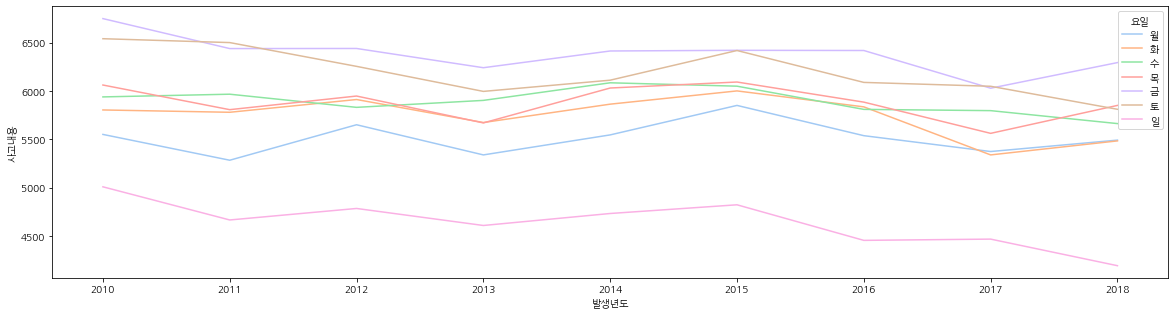

In [ ]:
# 2010 ~ 2018 년 요일별 상관관계
plt.figure(figsize=(20,5))
plt.rc('font', family='NanumGothic')
sns.lineplot(x="발생년도", y="사고내용", hue="요일", data=year_day, palette="pastel", legend='full', hue_order=['월','화','수','목','금','토','일'])
plt.show()
# 9개년치의 분석 결과, 일요일이 다른 요일에 비해 현저히 교통사고 건수가 적었으며, 금요일과 토요일에 가장 교통 사고가 많이 나는 것으로 확인되었습니다. (11,15,17년도는 금요일보다 토요일이 아슬아슬하게 더 많은?)

# 시간 별 사고 건수 분석하기


In [ ]:
# 시간 별 사고 건수 분석하기

hour_day = df.groupby(['발생년도','발생시간'])['사고내용'].count().reset_index()
hour_day

,발생년도,발생시간,사고내용
0,2010,00시,2097
1,2010,01시,1874
2,2010,02시,1473
3,2010,03시,1181
4,2010,04시,1016
...,...,...,...
211,2018,19시,2224
212,2018,20시,1955
213,2018,21시,1845
214,2018,22시,1863


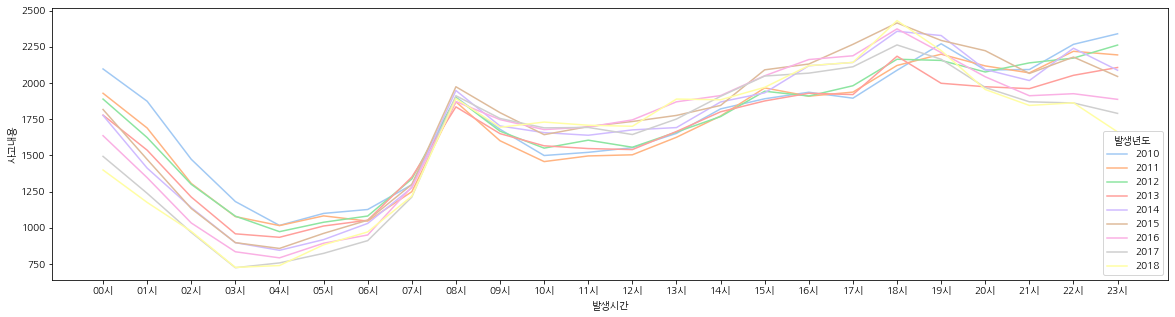

In [ ]:
# 00 ~ 23시 시간대별 사고 수
plt.figure(figsize=(20,5))
plt.rc('font', family='NanumGothic')
sns.lineplot(x="발생시간", y="사고내용", hue="발생년도", data=hour_day, palette="pastel", legend='full')
plt.show()
# 9개년치의 데이터를 모아보니... 매년 경향을 보니 08시와, 퇴근시간대 18~19시 및 야간시간대 20~23시에 많이 발생하네요??
#근데 여기서 더 놀라운 것은 16,17,18년도로 갈구록 퇴근 시간대의 교통사고 발생 건수가 증가하고, 야간 시간대의 교통사고 발생 건수가 줄어들고 있어요....

# 지역 별 사고 건수는??

In [ ]:
df_sub = df[['발생년도', '사고내용', '사고유형', '발생지_시군구', '도로형태']]
df_sub_gp = df_sub.groupby(['발생년도','발생지_시군구'])['사고내용'].count().reset_index()
df_sub_gp

,발생년도,발생지_시군구,사고내용
0,2010,강남구,3551
1,2010,강동구,1410
2,2010,강북구,1293
3,2010,강서구,1872
4,2010,관악구,1851
...,...,...,...
220,2018,용산구,1330
221,2018,은평구,1134
222,2018,종로구,1134
223,2018,중구,1128


# 지역별로 사고 분석해보기

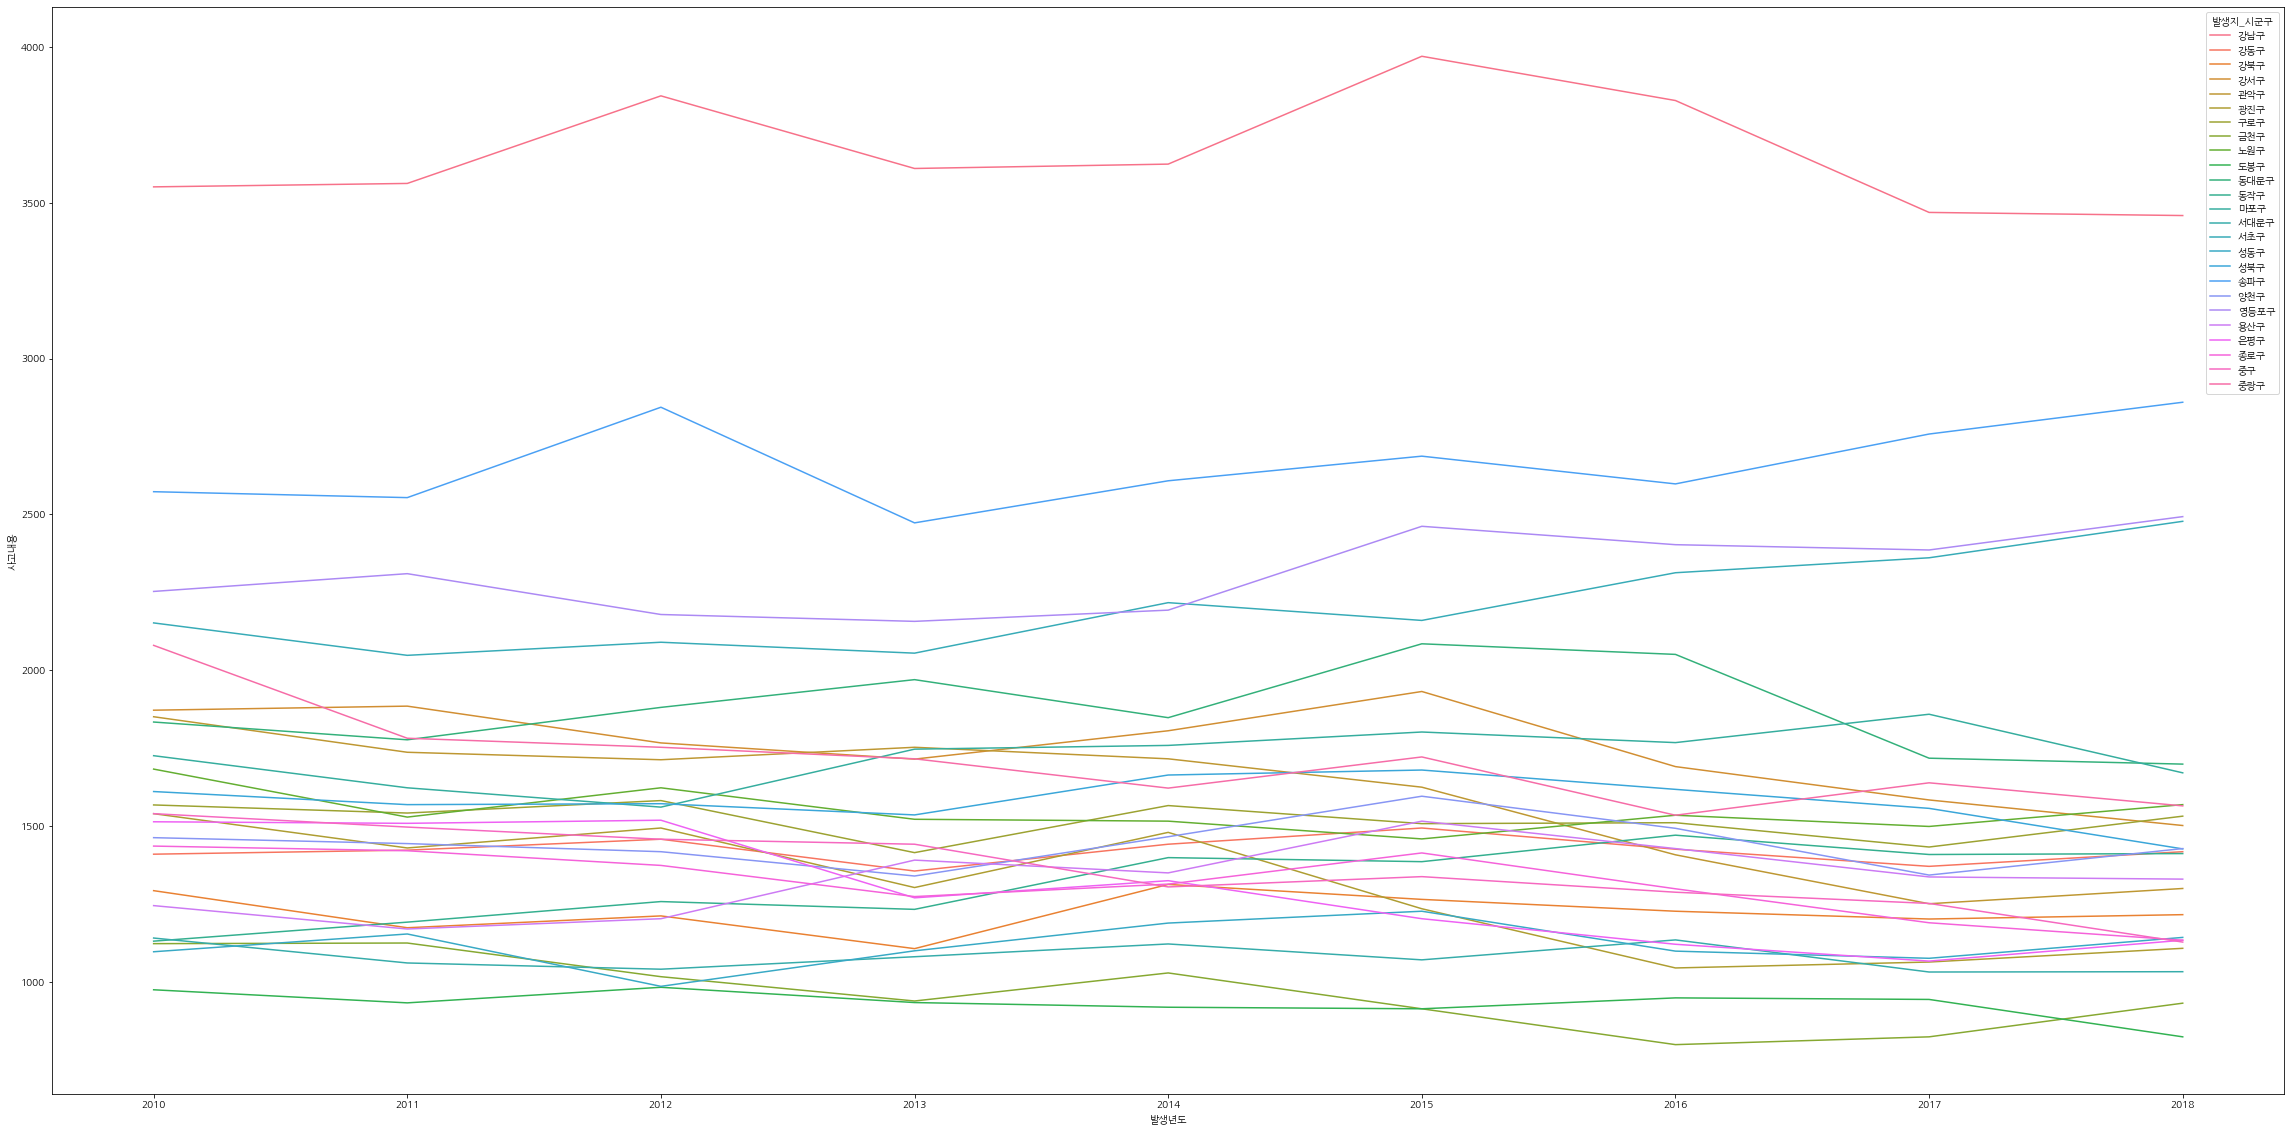

In [ ]:
plt.figure(figsize=(40,20))
sns.lineplot(x='발생년도', y='사고내용',hue='발생지_시군구', data=df_sub_gp, ci=None)

In [ ]:
df_subset = df[['발생년도','사고내용','사고유형','도로형태','가해자법규위반','가해자차종','피해자차종','가해자연령','피해자연령']]

df_subset['피해자연령'] = df_subset['피해자연령'].str.replace('세','')
df_subset['가해자연령'] = df_subset['가해자연령'].str.replace('세','')
df_subset['가해자연령'] = pd.to_numeric(df_subset['가해자연령'], errors='coerce')
df_subset['피해자연령'] = pd.to_numeric(df_subset['피해자연령'], errors='coerce')
df_subset

,발생년도,사고내용,사고유형,도로형태,가해자법규위반,가해자차종,피해자차종,가해자연령,피해자연령
0,2010,경상,기타,기타단일로,기타,승용차,이륜차,54.0,19.0
1,2010,중상,진행중 추돌,기타단일로,안전거리 미확보,승합차,승용차,57.0,39.0
2,2010,경상,진행중 추돌,기타단일로,기타,승용차,승용차,51.0,58.0
3,2010,경상,기타,교차로부근,안전거리 미확보,승용차,승용차,56.0,55.0
4,2010,경상,정면충돌,교차로내,신호위반,승용차,승용차,33.0,55.0
...,...,...,...,...,...,...,...,...,...
362292,2018,경상,기타,기타단일로,안전운전 의무 불이행,승용차,보행자,34.0,53.0
362293,2018,부상신고,횡단중,교차로횡단보도내,신호위반,승용차,보행자,56.0,35.0
362294,2018,경상,정면충돌,교차로내,신호위반,승용차,승용차,57.0,53.0
362295,2018,경상,길가장자리구역통행중,지하차도(도로)내,안전운전 의무 불이행,승용차,보행자,59.0,36.0


In [ ]:
df_subset.dtypes

발생년도         int64
사고내용        object
사고유형        object
도로형태        object
가해자법규위반     object
가해자차종       object
피해자차종       object
가해자연령      float64
피해자연령      float64
dtype: object

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


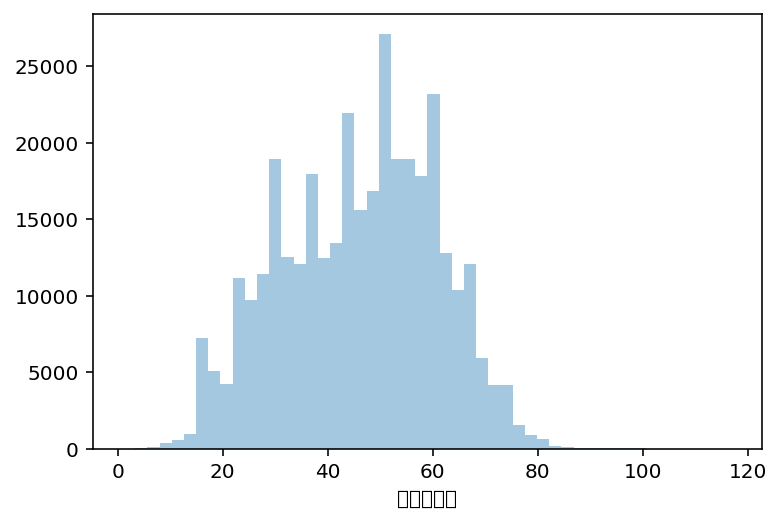

In [ ]:
sns.distplot(df_subset['가해자연령'], kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


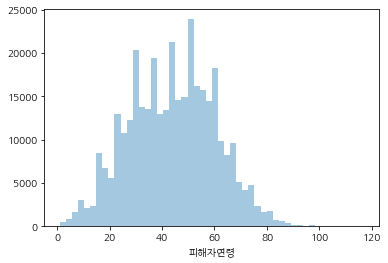

In [ ]:
sns.distplot(df_subset['피해자연령'], kde=False)

In [ ]:
# 연령대 함수 만들기
def aging(x):
  if x >= 60:
    return "60세 이상"
  elif x >= 40:
    return "40세 이상 59세 이하"
  elif x >= 19:
    return "19세 이상 39세 이하"
  else:
    return "18세 이하"


In [ ]:
df_subset['피해자 연령대'] = '불명'
df_subset['가해자 연령대'] = '불명'
df_subset = df_subset[df_subset['가해자연령'].notna()] # 연령에서 결측값은 제외하도록 하겠습니다.
df_subset = df_subset[df_subset['피해자연령'].notna()]
df_subset['가해자 연령대'] = df_subset['가해자연령'].apply(aging)
df_subset['피해자 연령대'] = df_subset['피해자연령'].apply(aging)


In [ ]:
df_subset['가해자연령'].unique() # 값이 잘 있는지 확인

array([ 54.,  57.,  51.,  56.,  33.,  58.,  26.,  30.,  34.,  53.,  27.,
        50.,  66.,  23.,  52.,  44.,  59.,  20.,  40.,  64.,  55.,  41.,
        31.,  49.,  46.,  60.,  45.,  29.,  48.,  47.,  24.,  67.,  37.,
        62.,  71.,  17.,  28.,  25.,  22.,  78.,  38.,  42.,  68.,  43.,
        70.,  61.,  36.,  63.,  69.,  15.,  39.,  65.,  19.,  18.,  35.,
        32.,  21.,  72.,  76.,  73.,  16.,  74.,  75.,  83.,  84.,  80.,
        11.,  86.,  79.,  77.,  12.,  85.,  14.,  13.,  10.,   7.,   8.,
        87.,  91.,  82.,   6.,  94.,   9.,  89.,  81.,   5.,  98.,  92.,
        93.,  88.,  90.,  95.,   4.,  99., 113., 117., 100., 106.,   1.])

# 연령대별 사고 유형 비율 계산하기

In [ ]:
df_subset
df_subset_gp = df_subset.groupby(['가해자 연령대','사고유형'])['사고내용'].count().reset_index()
df_subset_gp['가해자 연령대'].unique()[0]
df_subset_gp_items = []
for i in range(len(df_subset_gp['가해자 연령대'].unique())):
  sum = 0
  for j in range(len(df_subset_gp)):
    if df_subset_gp.loc[j, '가해자 연령대'] == df_subset_gp['가해자 연령대'].unique()[i]:
      sum += df_subset_gp.loc[j, '사고내용']
  df_subset_gp_items.append(sum)
df_subset_gp_items

df_subset_gp['가해자 연령 별 사고 유형 비율'] = 0
for i in range(len(df_subset_gp['가해자 연령대'].unique())):
  for j in range(len(df_subset_gp)):
    if df_subset_gp.loc[j, '가해자 연령대'] == df_subset_gp['가해자 연령대'].unique()[i]:
     df_subset_gp.loc[j, '가해자 연령 별 사고 유형 비율'] = df_subset_gp.loc[j, '사고내용'] / df_subset_gp_items[i] * 100
df_subset_gp.head()

,가해자 연령대,사고유형,사고내용,가해자 연령 별 사고 유형 비율
0,18세 이하,기타,3126,27.573432
1,18세 이하,길가장자리구역통행중,135,1.190791
2,18세 이하,보도통행중,297,2.619741
3,18세 이하,정면충돌,646,5.698156
4,18세 이하,주정차중 추돌,330,2.910823


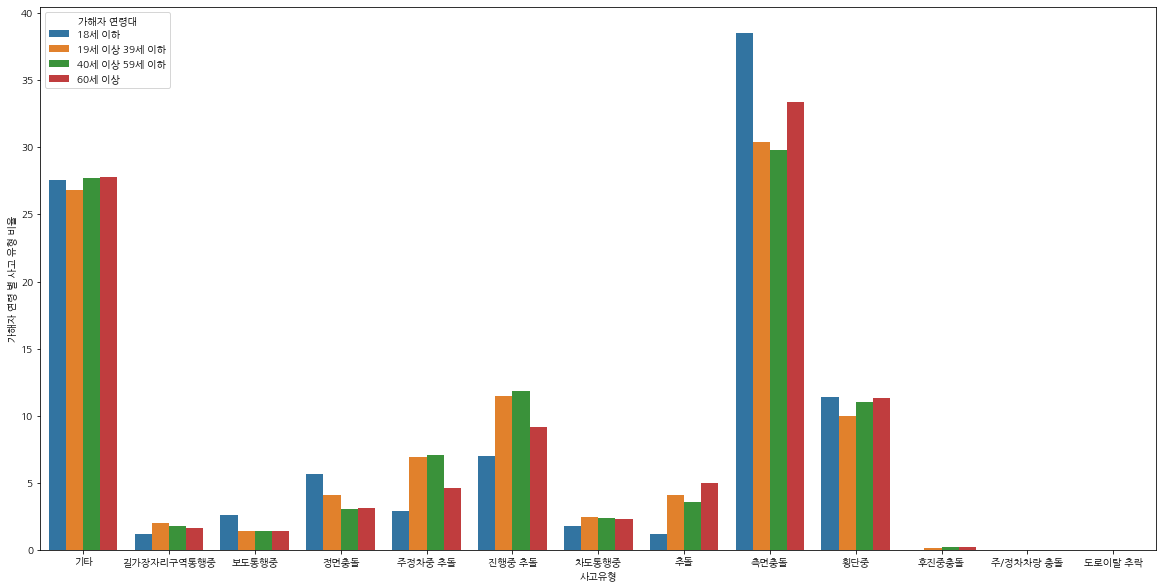

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='사고유형', y='가해자 연령 별 사고 유형 비율', hue='가해자 연령대',data=df_subset_gp)

In [ ]:
# 18세 이하 유소년의 교통 사고는 어떻게 있을까??

df_18 = df_subset[df_subset['가해자 연령대'] == '18세 이하']
df_18

,발생년도,사고내용,사고유형,도로형태,가해자법규위반,가해자차종,피해자차종,가해자연령,피해자연령,피해자 연령대,가해자 연령대
77,2010,경상,측면충돌,교차로내,안전운전 의무 불이행,이륜차,승용차,17.0,23.0,19세 이상 39세 이하,18세 이하
84,2010,부상신고,측면충돌,교차로부근,안전운전 의무 불이행,원동기장치자전거,승용차,17.0,35.0,19세 이상 39세 이하,18세 이하
168,2010,경상,측면충돌,교차로부근,안전운전 의무 불이행,이륜차,화물차,15.0,34.0,19세 이상 39세 이하,18세 이하
186,2010,경상,측면충돌,횡단보도상,안전거리 미확보,이륜차,승용차,18.0,47.0,40세 이상 59세 이하,18세 이하
245,2010,중상,측면충돌,기타단일로,기타,원동기장치자전거,승용차,18.0,42.0,40세 이상 59세 이하,18세 이하
...,...,...,...,...,...,...,...,...,...,...,...
361892,2018,경상,기타,기타,안전운전 의무 불이행,이륜차,승합차,18.0,43.0,40세 이상 59세 이하,18세 이하
362029,2018,경상,기타,기타,안전운전 의무 불이행,자전거,승용차,17.0,47.0,40세 이상 59세 이하,18세 이하
362110,2018,경상,기타,기타,안전운전 의무 불이행,자전거,보행자,14.0,37.0,19세 이상 39세 이하,18세 이하
362175,2018,부상신고,측면충돌,교차로내,기타,이륜차,승용차,18.0,59.0,40세 이상 59세 이하,18세 이하


In [ ]:
df_1939 = df_subset[df_subset['가해자 연령대'] == '19세 이상 39세 이하']
df_4059 = df_subset[df_subset['가해자 연령대'] == '40세 이상 59세 이하']
df_60 = df_subset[df_subset['가해자 연령대'] == '60세 이상']

In [ ]:
df_18['가해자차종'].value_counts()
# 18세 이하 유소년은 대부분 이륜차와 자전거에서 사고를 낸다. 너무 뻔한 얘기겠지만...

이륜차            5057
자전거            3197
원동기장치자전거       2425
승용차             609
불명               26
화물차              14
승합차               5
개인형이동수단(PM)       3
특수차               1
Name: 가해자차종, dtype: int64

In [ ]:
df_cycle = df[(df['가해자차종'] == '이륜차') |( df['가해자차종'] == '자전거')]
df_cycle.head()

,발생일,발생년도,발생월,발생일자,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
77,2010-01-01,2010,1,1,13시,금,구로구,경상,오류동,0,0,1,0,차대차,측면충돌,측면충돌,안전운전 의무 불이행,포장,건조,맑음,교차로,교차로내,이륜차,남,17세,경상,승용차,남,23세,상해없음
109,2010-01-01,2010,1,1,22시,금,동대문구,중상,청량리동,0,1,1,0,차대차,기타,기타,신호위반,포장,젖음/습기,흐림,교차로,교차로내,이륜차,기타불명,불명,기타불명,이륜차,남,43세,중상
167,2010-01-02,2010,1,2,18시,토,강동구,경상,상일동,0,0,1,0,차대차,정면충돌,정면충돌,교차로 통행방법 위반,포장,젖음/습기,맑음,교차로,교차로내,이륜차,남,48세,경상,이륜차,남,16세,상해없음
168,2010-01-02,2010,1,2,18시,토,구로구,경상,오류동,0,0,1,0,차대차,측면충돌,측면충돌,안전운전 의무 불이행,포장,건조,흐림,교차로,교차로부근,이륜차,남,15세,경상,화물차,여,34세,상해없음
186,2010-01-03,2010,1,3,00시,일,강북구,경상,수유동,0,0,1,0,차대차,측면충돌,측면충돌,안전거리 미확보,포장,젖음/습기,흐림,단일로,횡단보도상,이륜차,남,18세,경상,승용차,남,47세,상해없음


In [ ]:
df_cycle.groupby(['피해자차종'])['사고내용'].count().sort_values(ascending=False).reset_index()

,피해자차종,사고내용
0,승용차,17929
1,보행자,9691
2,자전거,3566
3,이륜차,3474
4,승합차,2371
5,화물차,2233
6,없음,1963
7,원동기장치자전거,468
8,불명,124
9,건설기계,89


In [ ]:
df_cyc_gp = df_cycle.groupby(['가해자법규위반'])['사고내용'].count().reset_index()

df_cyc_gp['위반별 비율'] = df_cyc_gp['사고내용'] / df_cyc_gp['사고내용'].sum(axis=0) * 100
df_cyc_gp['가해자차종'] = "이륜차|자전거"

In [ ]:
df_gp = df_subset.groupby(['가해자법규위반'])['사고내용'].count().reset_index()

df_gp['위반별 비율'] = df_gp['사고내용'] / df_gp['사고내용'].sum(axis=0) * 100
df_gp['가해자차종']="전체"

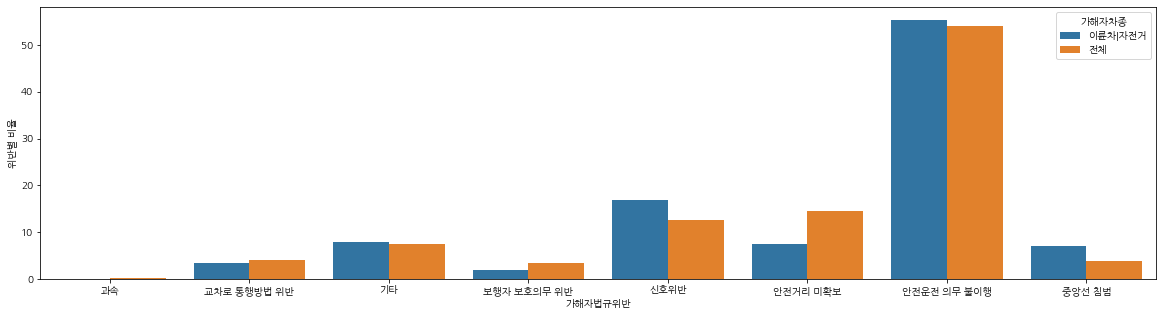

In [ ]:
df_mix = pd.concat([df_cyc_gp, df_gp])
plt.figure(figsize=(20,5))
sns.barplot(x='가해자법규위반',y='위반별 비율', hue='가해자차종', data=df_mix)